In [5]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 

In [6]:
income_df = pd.read_csv("../data/irs_county_2016.csv")
income_df = income_df.loc[income_df["STATE"] == "TN"]
income_df = income_df.loc[:, ['STATE', 'COUNTYNAME', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'N2', 'NUMDEP', 'ELDERLY', 'A00100', 'N02650', 'A02650', 'N02300', 'A02300']]
income_df.columns = ['state', 'county', 'income_bucket', 'return_count', 'single_returns', 'joint_returns', 'head_of_house_returns', 'exemptions', 'dependents', 'elderly', 'agi', 'returns_with_total_inc','total_inc_amt', 'returns_with_unemployment', 'unemployment_comp']

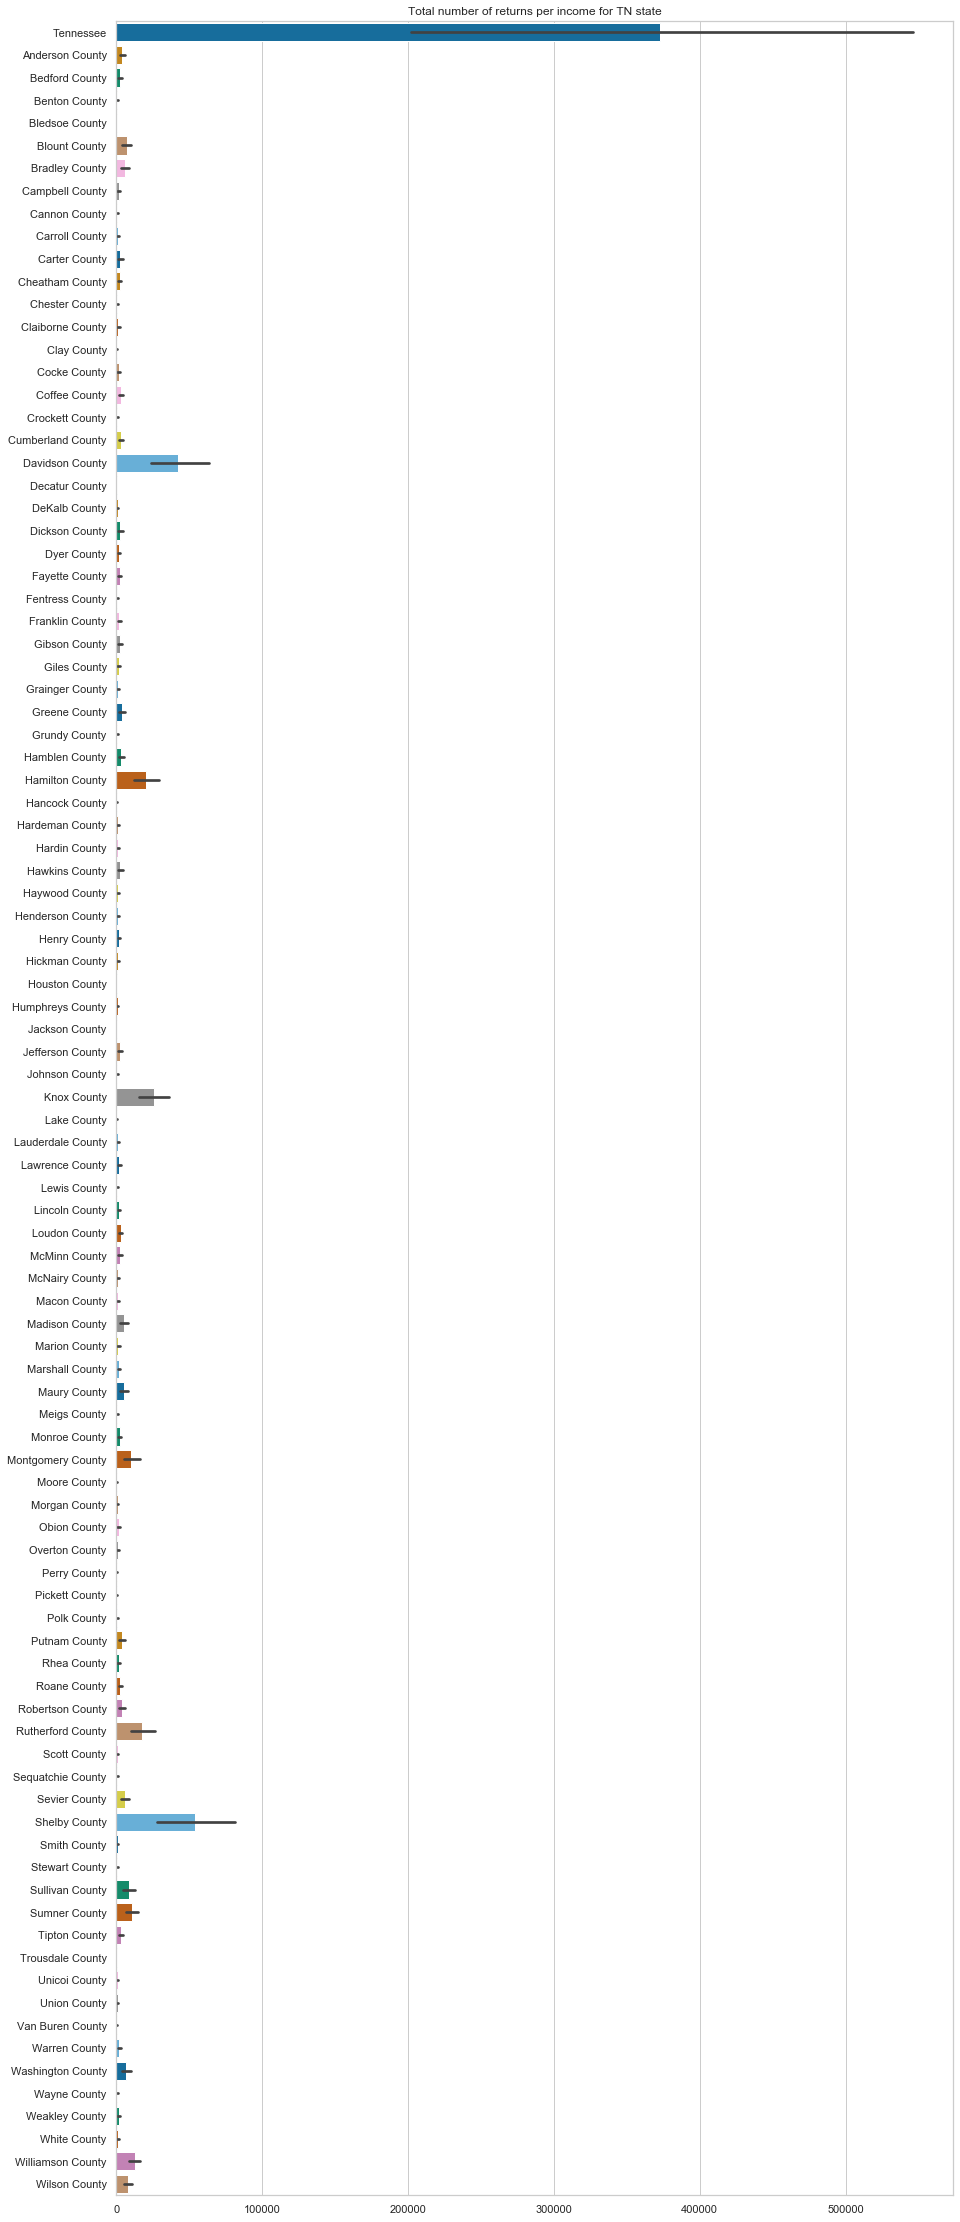

In [25]:
plt.figure(figsize = (15, 40))  # height and width: play around with it to get the right dimensions 
sns.set(style="whitegrid")
sns.barplot('returns_with_total_inc','county', data = income_df, palette = 'colorblind')
plt.xlabel('') # empty labels 
plt.ylabel('') # empty labels 
plt.title('Total number of returns per income for TN state'); # that keeps the object address from printing out 

In [38]:
income_county_agg = 1000 * income_df.total_inc_amt / income_df.return_count
income_county_agg.to_frame() # conver it to Data Frame 
income_df["income_county_agg"] = income_county_agg # add a new column 

In [30]:
print(income_county_agg)

19752    -68477.564426
19753      5552.190918
19754     17404.032449
19755     36471.180235
19756     62124.954008
             ...      
20515     37088.611111
20516     62732.475884
20517     87906.145251
20518    135657.391304
20519    408631.645570
Length: 768, dtype: float64


In [39]:
income_df.head()

,state,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,income_county_agg
19752,TN,Tennessee,1,39580,22400,14440,980,60360,8230,19090,-2747555,29090,-2710342,90,348,-68477.564426
19753,TN,Tennessee,2,439770,345410,39920,49300,443540,108380,74190,2366417,439780,2441687,4830,12132,5552.190918
19754,TN,Tennessee,3,717430,398720,115040,189290,1269420,472350,141070,12289681,717430,12486175,19660,58771,17404.032449
19755,TN,Tennessee,4,759340,355970,217710,159890,1486710,512170,154020,27370414,759340,27694026,19120,57012,36471.180235
19756,TN,Tennessee,5,396810,128390,215890,42240,881020,268500,106740,24350682,396810,24651803,10630,33894,62124.954008


In [46]:
income_df = income_df[income_df.county != "Tennessee"] # drop a row that is Tennessee in a column county 

In [49]:
income_df.head()

,state,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,income_county_agg
19760,TN,Anderson County,1,390,220,140,0,570,60,210,-7663,240,-7465,0,0,-19141.025641
19761,TN,Anderson County,2,5170,4010,500,610,5330,1260,950,27496,5170,28135,60,156,5441.972921
19762,TN,Anderson County,3,8190,4670,1500,1840,13930,4590,1950,140592,8190,142497,180,597,17398.901099
19763,TN,Anderson County,4,8280,3750,2810,1440,16160,5090,2030,298169,8280,300960,200,699,36347.826087
19764,TN,Anderson County,5,4630,1390,2720,420,10470,3110,1510,284857,4630,287608,140,539,62118.358531


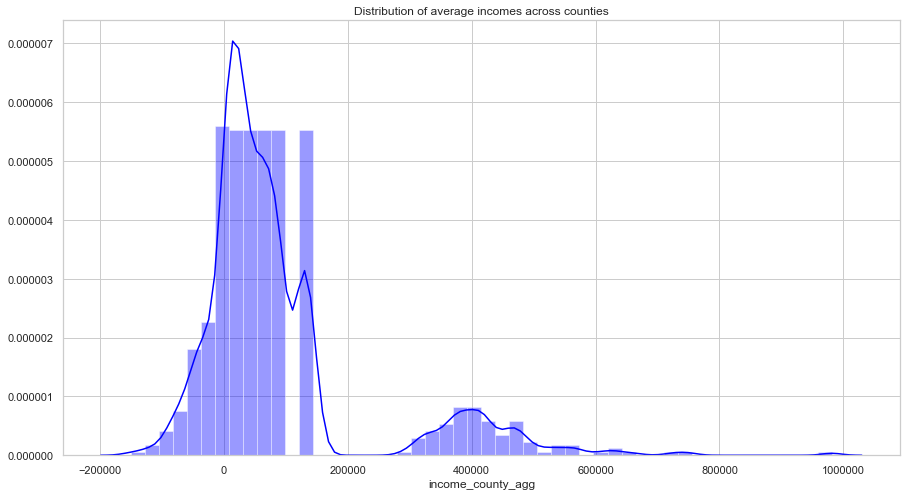

In [65]:
plt.figure(figsize = (15, 8))  # height and width: play around with it to get the right dimensions 
sns.set(style="whitegrid")
sns.distplot(income_df['income_county_agg'], bins=50, color = 'blue')
plt.title('Distribution of average incomes across counties'); # that keeps the object address from printing out 

In [66]:
cancer_cost_df = pd.read_csv("../data/mmd_cancer_data.csv") # create another DataFrame 
cancer_cost_df = cancer_cost_df.loc[cancer_cost_df["state"] == "TENNESSEE"] # only keep row for TN

In [67]:
cancer_cost_df.head()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
2396,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47001,Anderson County,TENNESSEE,Urban,All,undefined,15454
2397,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47003,Bedford County,TENNESSEE,Rural,All,undefined,19219
2398,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47005,Benton County,TENNESSEE,Rural,All,undefined,21315
2399,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47007,Bledsoe County,TENNESSEE,Rural,All,undefined,19250
2400,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47009,Blount County,TENNESSEE,Urban,All,undefined,17073


In [70]:
cancer_cost_df_rural = cancer_cost_df.loc[cancer_cost_df['urban'] == 'Rural']
cancer_cost_df_rural = cancer_cost_df_rural.analysis_value.describe()
cancer_cost_df_rural.head()

count       57.000000
mean     19837.421053
std       2255.416100
min      15531.000000
25%      18328.000000
Name: analysis_value, dtype: float64

In [71]:
cancer_cost_df_urban = cancer_cost_df.loc[cancer_cost_df['urban'] == 'Urban']
cancer_cost_df_urban = cancer_cost_df_urban.analysis_value.describe()
cancer_cost_df_urban.head()

count       38.000000
mean     19638.605263
std       2712.218435
min      15454.000000
25%      17674.750000
Name: analysis_value, dtype: float64

Text(0.5, 1.0, 'Cost of cancer in urban')

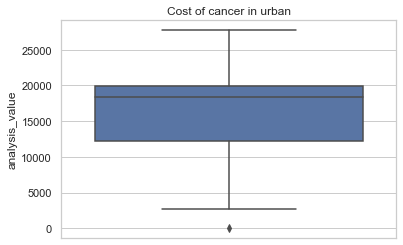

In [76]:
sns.boxplot(y=cancer_cost_df_urban)
plt.title("Cost of cancer in urban")

Text(0.5, 1.0, 'Cost of cancer in rural')

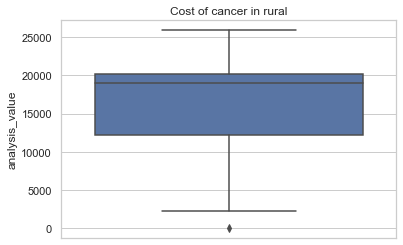

In [77]:
sns.boxplot(y=cancer_cost_df_rural)
plt.title("Cost of cancer in rural")

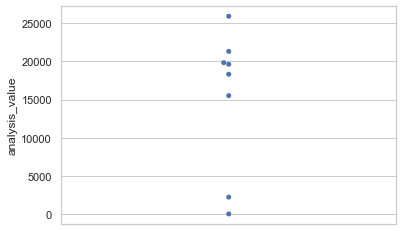

In [78]:
sns.swarmplot(y=cancer_cost_df_rural)

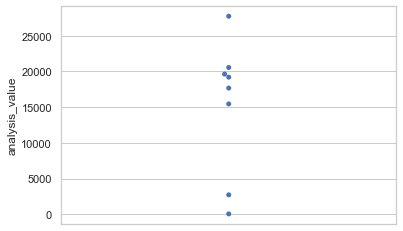

In [79]:
sns.swarmplot(y=cancer_cost_df_urban)

In [80]:
ha_cost_df = pd.read_csv('../data/mmd_heart_attack_data.csv') # create a DataFrame 
ha_cost_df = ha_cost_df.loc[ha_cost_df["state"] == "TENNESSEE"] # keep only the rows for state in TN

In [81]:
ha_cost_df_rural = ha_cost_df.loc[ha_cost_df['urban'] == 'Rural']
ha_cost_df_rural = ha_cost_df_rural.analysis_value.describe()
ha_cost_df_rural.head()

count       53.000000
mean     45773.075472
std       6232.724885
min      30831.000000
25%      41240.000000
Name: analysis_value, dtype: float64

In [85]:
ha_cost_df_urban = ha_cost_df.loc[ha_cost_df['urban'] == 'Urban']
ha_cost_df_urban = ha_cost_df_urban.analysis_value.describe()
ha_cost_df_urban.head()

count       38.000000
mean     45748.921053
std       7109.788921
min      32279.000000
25%      40452.750000
Name: analysis_value, dtype: float64

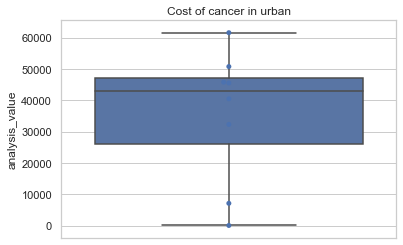

In [86]:
sns.boxplot(y=ha_cost_df_urban)
plt.title("Cost of cancer in urban")
sns.swarmplot(y=ha_cost_df_urban)

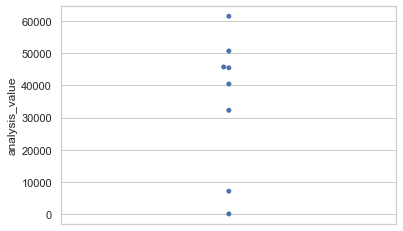

In [87]:
sns.swarmplot(y=ha_cost_df_urban)

Text(0.5, 1.0, 'Cost of cancer in rural')

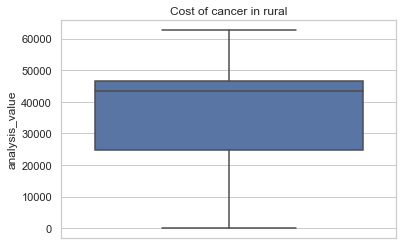

In [88]:
sns.boxplot(y=ha_cost_df_rural)
plt.title("Cost of cancer in rural")

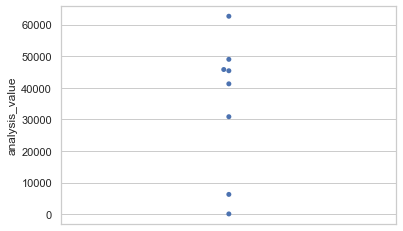

In [89]:
sns.swarmplot(y=ha_cost_df_rural)